In [2]:
# import the libraries
from keras.models  import Sequential,Model
from keras.layers import Dense, Conv2D, Flatten ,Input
from keras.applications.vgg19 import VGG19
from keras.preprocessing.image import ImageDataGenerator ,load_img
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
from glob import glob

In [3]:
# resize all the image to this
img_size=[224,224]

train_path ="data/train"
test_path ="data/test"

In [4]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg_19=VGG19(input_shape=img_size + [3],weights="imagenet",include_top=False)

In [5]:
vgg_19.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [6]:
# don't train existing weights

for layer in vgg_19.layers:
  layer.trainable =False


In [7]:
# useful for getting number of output classes
folders=glob("data/train/*")

In [8]:
# our layers - you can add more if you want
x=Flatten()(vgg_19.output)

In [9]:
pred=Dense(len(folders),activation ="softmax")(x)
#create a model object
model=Model(inputs=vgg_19.input,outputs=pred)

In [10]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [11]:
# tell the model what cost and optimization method to use
model.compile(loss="categorical_crossentropy",metrics="accuracy",optimizer="adam")

In [12]:
# Use the Image Data Generator to import the images from the dataset
train_set=ImageDataGenerator(rescale=1./255, shear_range=.2, horizontal_flip=True, zoom_range=0.2)
test_set = ImageDataGenerator(rescale=1./255)

In [16]:
training_set=train_set.flow_from_directory("data/train",
                                           target_size=(224,224),batch_size=32,class_mode="categorical")
testing_set =test_set.flow_from_directory("data/test", 
                                          target_size=(224,224),batch_size=32,class_mode="categorical")

Found 1951 images belonging to 4 classes.
Found 18 images belonging to 4 classes.


In [17]:
# fit the model
# Run the cell. It will take some time to execute
cotton_m=model.fit_generator(training_set,validation_data=testing_set,
                             epochs=10,steps_per_epoch=len(training_set),
                             validation_steps=len(testing_set))

Epoch 1/10
61/61 [==============================] - 595s 10s/step - loss: 0.2299 - accuracy: 0.9159 - val_loss: 0.1118 - val_accuracy: 0.9444
Epoch 2/10
61/61 [==============================] - 600s 10s/step - loss: 0.1919 - accuracy: 0.9247 - val_loss: 0.1462 - val_accuracy: 0.9444
Epoch 3/10
61/61 [==============================] - 722s 12s/step - loss: 0.2155 - accuracy: 0.9165 - val_loss: 0.1555 - val_accuracy: 0.9444
Epoch 4/10
61/61 [==============================] - 563s 9s/step - loss: 0.1521 - accuracy: 0.9421 - val_loss: 0.1034 - val_accuracy: 0.9444
Epoch 5/10
61/61 [==============================] - 575s 9s/step - loss: 0.1305 - accuracy: 0.9528 - val_loss: 0.1123 - val_accuracy: 0.9444
Epoch 6/10
61/61 [==============================] - 679s 11s/step - loss: 0.1164 - accuracy: 0.9575 - val_loss: 0.1625 - val_accuracy: 0.9444
Epoch 7/10
61/61 [==============================] - 676s 11s/step - loss: 0.1069 - accuracy: 0.9692 - val_loss: 0.0602 - val_accuracy: 1.0000
Epoch 8/

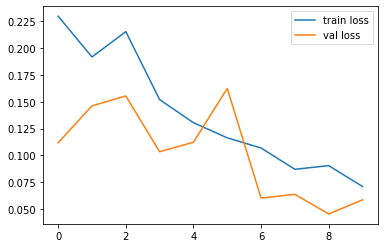

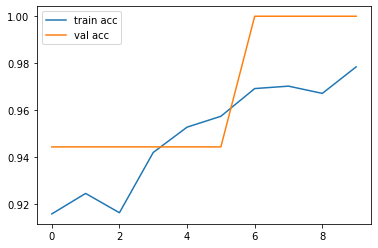

In [18]:
# plot the loss
plt.plot(cotton_m.history['loss'], label='train loss')
plt.plot(cotton_m.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(cotton_m.history['accuracy'], label='train acc')
plt.plot(cotton_m.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
#plt.savefig('AccVal_acc')

In [19]:
y_pred=model.predict(testing_set)

In [20]:
y_pred

array([[1.1551680e-02, 1.3653265e-09, 9.8844832e-01, 7.4445370e-09],
       [2.1318061e-05, 9.9939823e-01, 4.2956631e-06, 5.7618471e-04],
       [1.7829600e-03, 4.2477715e-01, 8.4646262e-04, 5.7259351e-01],
       [9.9976867e-01, 3.8574867e-06, 2.2641642e-04, 1.0358667e-06],
       [3.6276608e-06, 9.8977178e-01, 7.1908667e-05, 1.0152656e-02],
       [2.3781696e-01, 1.4813244e-06, 7.6213598e-01, 4.5584184e-05],
       [7.6524693e-06, 7.9514999e-03, 2.6540423e-04, 9.9177539e-01],
       [5.8364921e-04, 9.1512024e-01, 2.6315503e-02, 5.7980552e-02],
       [7.5816456e-07, 9.0849957e-05, 5.0913903e-04, 9.9939930e-01],
       [7.3746080e-05, 2.8084078e-06, 9.9989831e-01, 2.5206875e-05],
       [3.8260632e-04, 1.5556660e-09, 9.9961722e-01, 1.1636888e-07],
       [7.6504635e-05, 9.8968494e-01, 2.3587874e-05, 1.0215037e-02],
       [5.7143414e-05, 3.8209005e-04, 5.3148642e-07, 9.9956018e-01],
       [2.0195180e-06, 3.4960694e-04, 5.0519669e-04, 9.9914312e-01],
       [9.9881458e-01, 2.9254638e-

In [21]:
y_pred=np.argmax(y_pred,axis=1)

In [22]:
model.save("cotton_prd.h5")